Si le R¬≤ du mod√®le polynomial est sup√©rieur √† celui du mod√®le lin√©aire, cela montre que la r√©gression polynomiale est plus adapt√©e pour capturer la non-lin√©arit√© des donn√©es.
Le RMSE plus faible indique que la r√©gression polynomiale donne de meilleures pr√©dictions que la r√©gression lin√©aire.
Attention √† ne pas choisir un degr√© trop √©lev√©, sinon on risque le sur-ajustement.


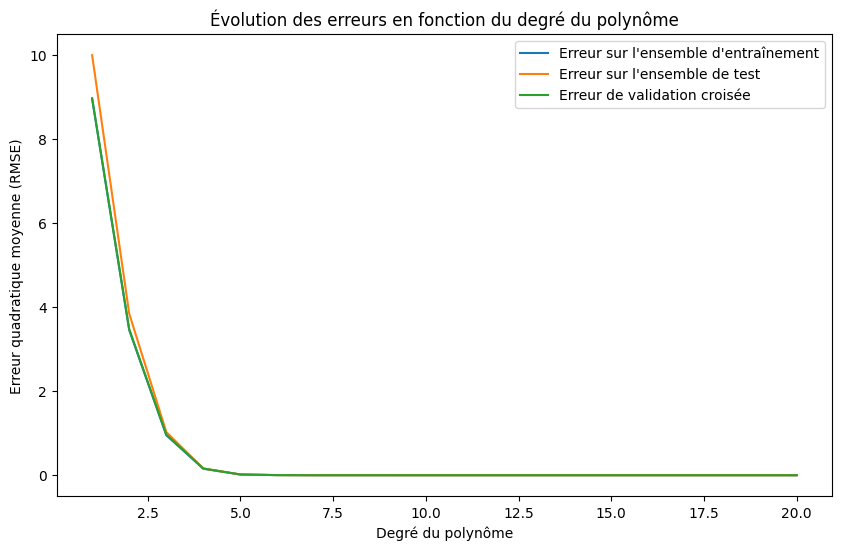

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Charger les donn√©es
df = pd.read_csv("/content/manufacturing.csv")  # Remplacez par le chemin r√©el de votre fichier

# S√©lection des variables les plus corr√©l√©es avec 'Quality Rating'
correlation_matrix = df.corr()
correlation_with_target = correlation_matrix["Quality Rating"].abs().sort_values(ascending=False)
selected_features = correlation_with_target.index[1:4]  # S√©lection des 3 variables les plus corr√©l√©es

X = df[selected_features]
y = df["Quality Rating"]

# Normalisation des donn√©es
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# S√©paration des donn√©es en ensemble d'entra√Ænement et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialisation des listes pour stocker les scores
degrees = list(range(1, 21))
train_errors = []
test_errors = []
cross_val_scores = []

# Boucle sur les diff√©rents degr√©s de polyn√¥mes
for degree in degrees:
    # Cr√©ation du pipeline avec transformation polynomiale et r√©gression lin√©aire
    model = make_pipeline(PolynomialFeatures(degree, include_bias=False), LinearRegression())

    # Entra√Ænement du mod√®le
    model.fit(X_train, y_train)

    # Pr√©dictions sur l'ensemble d'entra√Ænement
    y_train_pred = model.predict(X_train)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    train_errors.append(train_rmse)

    # Pr√©dictions sur l'ensemble de test
    y_test_pred = model.predict(X_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    test_errors.append(test_rmse)

    # Validation crois√©e
    cross_val_score_mean = -cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()
    cross_val_scores.append(np.sqrt(cross_val_score_mean))

# Visualisation des erreurs en fonction du degr√© du polyn√¥me
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_errors, label='Erreur sur l\'ensemble d\'entra√Ænement')
plt.plot(degrees, test_errors, label='Erreur sur l\'ensemble de test')
plt.plot(degrees, cross_val_scores, label='Erreur de validation crois√©e')
plt.xlabel('Degr√© du polyn√¥me')
plt.ylabel('Erreur quadratique moyenne (RMSE)')
plt.title('√âvolution des erreurs en fonction du degr√© du polyn√¥me')
plt.legend()
plt.show()


In [ ]:
correlation_matrix = df.corr()
correlation_matrix

Temperature (¬∞C)  Pressure (kPa)  \
Temperature (¬∞C)                        1.000000       -0.024754   
Pressure (kPa)                         -0.024754        1.000000   
Temperature x Pressure                  0.571743        0.773572   
Material Fusion Metric                  0.974901        0.151095   
Material Transformation Metric          0.971210       -0.022862   
Quality Rating                         -0.461279        0.013129   

                                Temperature x Pressure  \
Temperature (¬∞C)                              0.571743   
Pressure (kPa)                                0.773572   
Temperature x Pressure                        1.000000   
Material Fusion Metric                        0.694733   
Material Transformation Metric                0.555579   
Quality Rating                               -0.258474   

                                Material Fusion Metric  \
Temperature (¬∞C)                              0.974901   
Pressure (kPa)                                0.151095   
Temperature x Pressure                        0.694733   
Material Fusion Metric                        1.000000   
Material Transformation Metric                0.976708   
Quality Rating                               -0.511972   

                                Material Transformation Metric  Quality Rating  
Temperature (¬∞C)                                      0.971210       -0.461279  
Pressure (kPa)                                       -0.022862        0.013129  
Temperature x Pressure                                0.555579       -0.258474  
Material Fusion Metric                                0.976708       -0.511972  
Material Transformation Metric                        1.000000       -0.575756  
Quality Rating                                       -0.575756        1.000000

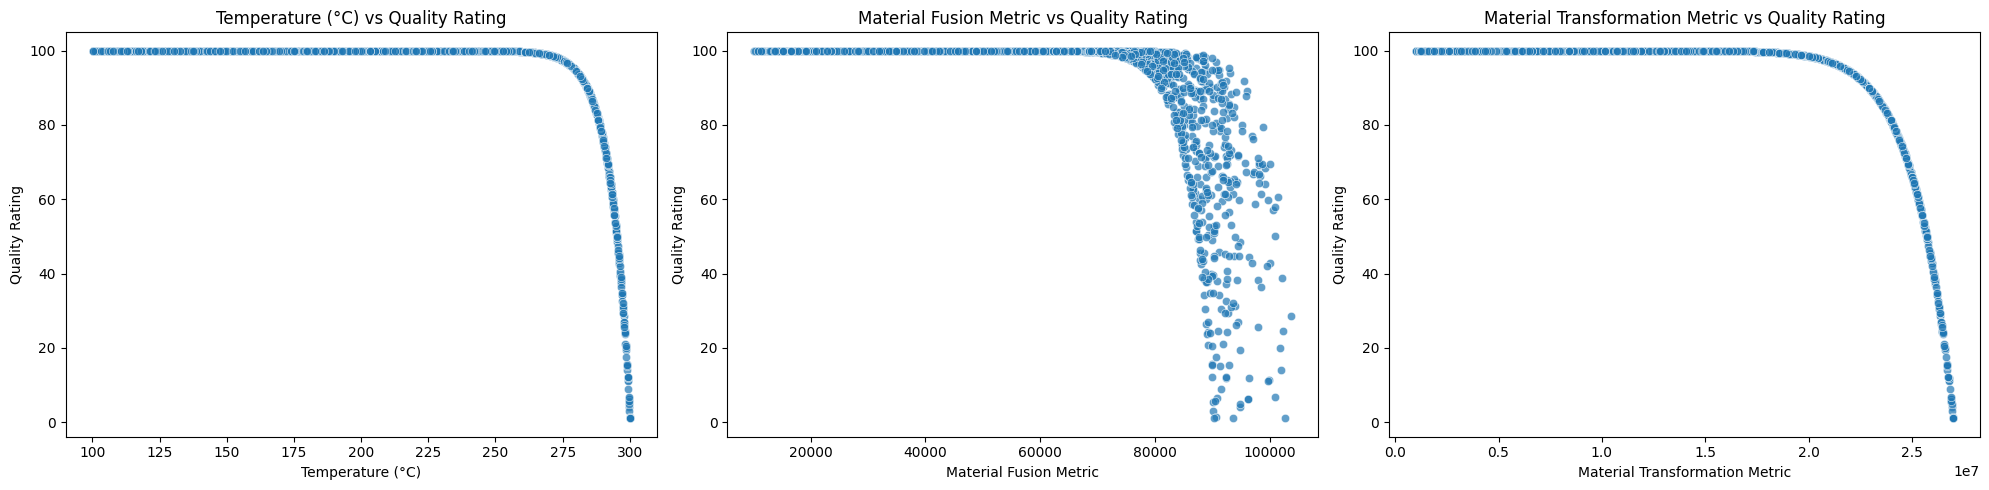

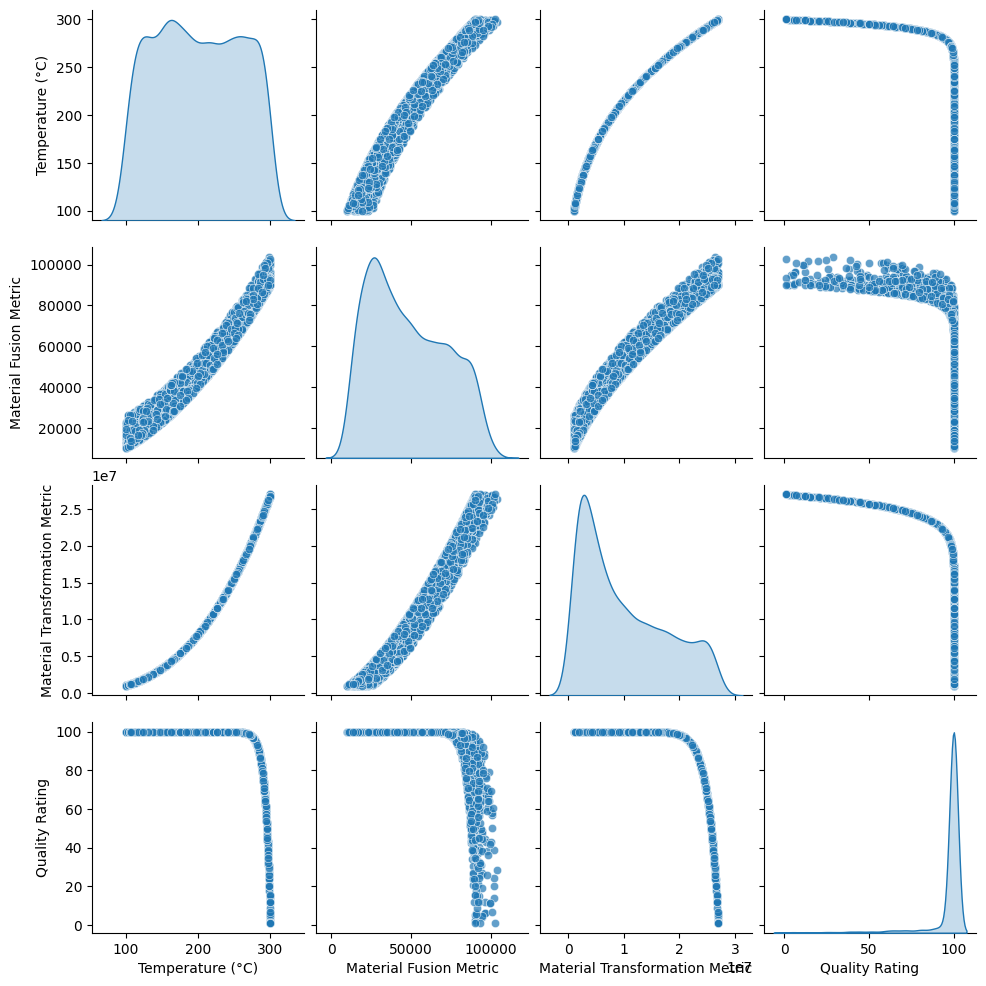

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assurez-vous que 'df' est d√©fini et contient les colonnes n√©cessaires.
# Features et cible √† analyser
features = ['Temperature (¬∞C)', 'Material Fusion Metric', 'Material Transformation Metric']
target = 'Quality Rating'

# V√©rification de l'existence des colonnes
if set(features + [target]).issubset(df.columns):
    # Scatter plots individuels
    plt.figure(figsize=(20, 5))

    for i, col in enumerate(features):
        plt.subplot(1, len(features), i + 1)  # Subplots c√¥te √† c√¥te
        sns.scatterplot(x=df[col], y=df[target], marker='o', alpha=0.7)
        plt.title(f"{col} vs {target}")
        plt.xlabel(col)
        plt.ylabel(target)

    plt.tight_layout()
    plt.show()

    # Pairplot pour toutes les relations
    sns.pairplot(
        df[features + [target]],
        kind='scatter',
        diag_kind='kde',
        markers='o',
        plot_kws={'alpha': 0.7}
    )
    plt.show()
else:
    print("Erreur : V√©rifiez que toutes les colonnes n√©cessaires existent dans le DataFrame.")


Affichage de Graphiques

plt.tight_layout()
plt.show()
Trois graphiques de dispersion sont affich√©s montrant la relation entre Quality Rating (axe Y) et :
Temperature (¬∞C)
Material Fusion Metric
Material Transformation Metric
Tous montrent une chute rapide apr√®s un certain seuil, sugg√©rant une non-lin√©arit√©.
Transformation en Polyn√¥mes

Importation de Seaborn (import seaborn as sns).
Transformation des donn√©es d'entr√©e X en utilisant PolynomialFeatures(degree=2) pour capturer des relations non lin√©aires.
üìä Interpr√©tation des Graphiques
Il semble que Quality Rating diminue fortement apr√®s un certain point dans toutes les variables.
Cela peut indiquer un effet seuil o√π la qualit√© se d√©t√©riore apr√®s une certaine temp√©rature ou m√©trique.
La r√©gression polynomiale est utilis√©e pour mieux mod√©liser cette relation non lin√©aire.



üìà Performance du mod√®le polynomiale:
RMSE: 6.194760497156036
R¬≤: 0.8120257483039748

üìä Comparaison des performances :
R¬≤ R√©gression Lin√©aire: 0.5100879426174683
R¬≤ R√©gression Polyn√¥miale: 0.8120257483039748


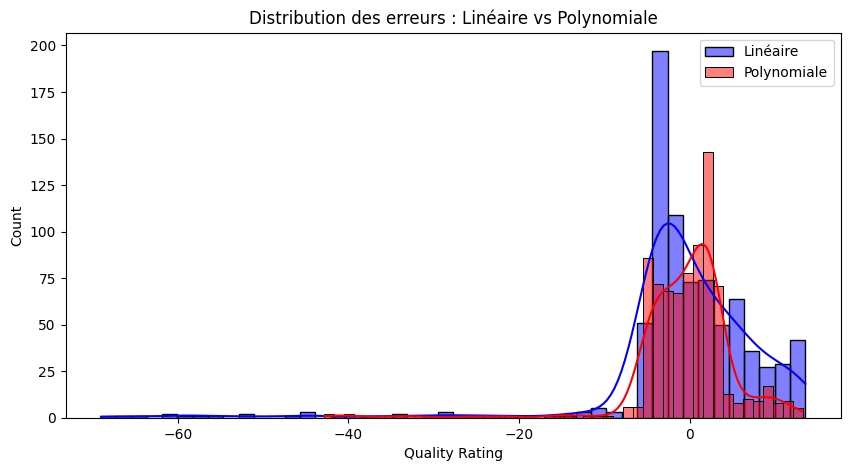

In [ ]:
import seaborn as sns
#  Transformation en polyn√¥mes de degr√© 2
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

#  S√©paration des donn√©es en train/test
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

#  Entra√Ænement du mod√®le
model = LinearRegression()
model.fit(X_train, y_train)

#  Pr√©dictions
y_pred = model.predict(X_test)

#  √âvaluation du mod√®le
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"\nüìà Performance du mod√®le polynomiale:")
print(f"RMSE: {rmse}")
print(f"R¬≤: {r2}")

#  Comparaison avec une r√©gression lin√©aire simple (sans polyn√¥mes)
model_lin = LinearRegression()
X_train_lin, X_test_lin, y_train_lin, y_test_lin = train_test_split(X, y, test_size=0.2, random_state=42)
model_lin.fit(X_train_lin, y_train_lin)
y_pred_lin = model_lin.predict(X_test_lin)
r2_lin = r2_score(y_test_lin, y_pred_lin)

print(f"\nüìä Comparaison des performances :")
print(f"R¬≤ R√©gression Lin√©aire: {r2_lin}")
print(f"R¬≤ R√©gression Polyn√¥miale: {r2}")

#  Visualisation des erreurs
residuals_poly = y_test - y_pred
residuals_lin = y_test_lin - y_pred_lin

plt.figure(figsize=(10, 5))
sns.histplot(residuals_lin, color="blue", label="Lin√©aire", kde=True)
sns.histplot(residuals_poly, color="red", label="Polynomiale", kde=True)
plt.legend()
plt.title("Distribution des erreurs : Lin√©aire vs Polynomiale")
plt.show()

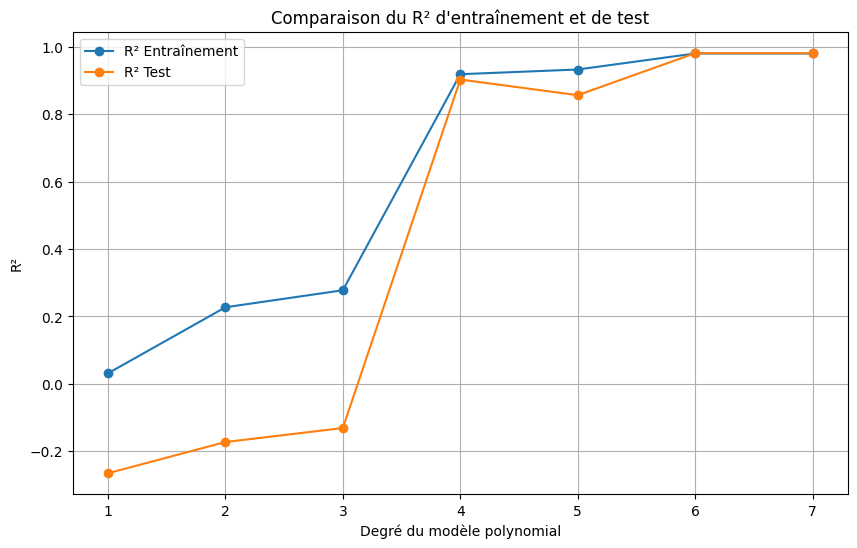

([0.0314856179084565,
  0.22725336910751648,
  0.27769141361309924,
  0.9181608392705604,
  0.9321104431432167,
  0.9796242331137188,
  0.979628868196938],
 [-0.26476731037457313,
  -0.17229452662297118,
  -0.13079844317588596,
  0.9023548438819369,
  0.8560491750865582,
  0.9803934817485674,
  0.9803862232248183])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# G√©n√©ration de donn√©es fictives
np.random.seed(42)
X = np.sort(np.random.rand(100, 1) * 10, axis=0)  # 100 √©chantillons entre 0 et 10
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])  # Donn√©es avec bruit autour de sin(x)

# S√©parer les donn√©es en ensemble d'entra√Ænement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fonction pour ajuster des mod√®les polynomiaux de diff√©rents degr√©s
def polynomial_regression(X_train, y_train, X_test, y_test, degrees):
    train_r2 = []
    test_r2 = []

    for degree in degrees:
        # Transformation polynomiale
        poly = PolynomialFeatures(degree)
        X_train_poly = poly.fit_transform(X_train)
        X_test_poly = poly.transform(X_test)

        # Entra√Æner le mod√®le
        model = LinearRegression()
        model.fit(X_train_poly, y_train)

        # Pr√©dictions et calcul de R¬≤
        y_train_pred = model.predict(X_train_poly)
        y_test_pred = model.predict(X_test_poly)

        train_r2.append(r2_score(y_train, y_train_pred))
        test_r2.append(r2_score(y_test, y_test_pred))

    return train_r2, test_r2

# Degr√©s pour les mod√®les polynomiaux
degrees = [1, 2, 3, 4, 5, 6, 7]

# Calcul des R¬≤ pour diff√©rents degr√©s
train_r2, test_r2 = polynomial_regression(X_train, y_train, X_test, y_test, degrees)

# Affichage des r√©sultats
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_r2, label='R¬≤ Entra√Ænement', marker='o')
plt.plot(degrees, test_r2, label='R¬≤ Test', marker='o')
plt.xlabel('Degr√© du mod√®le polynomial')
plt.ylabel('R¬≤')
plt.title('Comparaison du R¬≤ d\'entra√Ænement et de test')
plt.legend()
plt.grid(True)
plt.show()

train_r2, test_r2


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression

# G√©n√©ration de donn√©es non lin√©aires (par exemple, y = sin(x) + bruit)
X = np.sort(np.random.rand(200, 1) * 10, axis=0)  # 200 √©chantillons entre 0 et 10
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])  # Sinusoidal avec bruit

# S√©parer les donn√©es en ensemble d'entra√Ænement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mod√®le Lin√©aire
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_train_pred_linear = linear_model.predict(X_train)
y_test_pred_linear = linear_model.predict(X_test)

# Mod√®le Polynomial (degr√© 3)
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_train_pred_poly = poly_model.predict(X_train_poly)
y_test_pred_poly = poly_model.predict(X_test_poly)

# Calcul des m√©triques
mae_linear_train = mean_absolute_error(y_train, y_train_pred_linear)
mae_poly_train = mean_absolute_error(y_train, y_train_pred_poly)
mae_linear_test = mean_absolute_error(y_test, y_test_pred_linear)
mae_poly_test = mean_absolute_error(y_test, y_test_pred_poly)

mse_linear_train = mean_squared_error(y_train, y_train_pred_linear)
mse_poly_train = mean_squared_error(y_train, y_train_pred_poly)
mse_linear_test = mean_squared_error(y_test, y_test_pred_linear)
mse_poly_test = mean_squared_error(y_test, y_test_pred_poly)

# R√©sultats
(mae_linear_train, mae_poly_train, mae_linear_test, mae_poly_test,
 mse_linear_train, mse_poly_train, mse_linear_test, mse_poly_test)


(0.5560256435761003,
 0.5246368195594671,
 0.5364485384970624,
 0.42411001918239677,
 0.43596440886409554,
 0.3561829808421605,
 0.4172328590995097,
 0.25019653568442773)

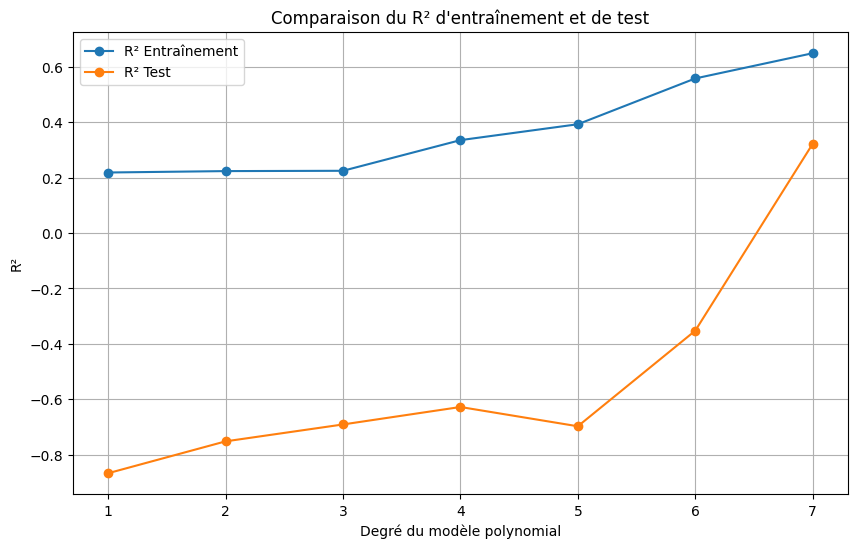

R¬≤ d'entra√Ænement pour diff√©rents degr√©s : [0.21866060262902187, 0.22372536639785967, 0.22482141000558353, 0.33546883619896306, 0.39286646642305545, 0.5581718351805885, 0.6492349836830074]
R¬≤ de test pour diff√©rents degr√©s : [-0.8668673350663003, -0.7518262651926795, -0.6908409575899528, -0.6278122076990726, -0.6973956699416621, -0.3523756122715287, 0.3221718082419952]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Donn√©es g√©n√©r√©es pr√©c√©demment : heures de travail et productivit√©
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
              21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
              39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]).reshape(-1, 1)
y = np.array([1.5, 3.2, 5.1, 6.8, 8.2, 9.1, 9.3, 8.8, 7.5, 6.0, 4.3, 2.8, 1.5, 0.5,
              0.1, 0.2, 0.9, 1.8, 3.0, 4.2, 5.3, 6.0, 6.5, 6.3, 5.4, 4.0, 2.5, 1.1,
              0.2, 0.1, 0.3, 1.0, 1.7, 2.3, 2.9, 3.3, 3.7, 3.9, 4.0, 4.0, 3.8, 3.5,
              3.1, 2.7, 2.3, 1.9, 1.5, 1.1, 0.7, 0.4])

# S√©parer les donn√©es en ensemble d'entra√Ænement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fonction pour ajuster des mod√®les polynomiaux de diff√©rents degr√©s
def polynomial_regression(X_train, y_train, X_test, y_test, degrees):
    train_r2 = []
    test_r2 = []

    for degree in degrees:
        # Transformation polynomiale
        poly = PolynomialFeatures(degree)
        X_train_poly = poly.fit_transform(X_train)
        X_test_poly = poly.transform(X_test)

        # Entra√Æner le mod√®le
        model = LinearRegression()
        model.fit(X_train_poly, y_train)

        # Pr√©dictions et calcul de R¬≤
        y_train_pred = model.predict(X_train_poly)
        y_test_pred = model.predict(X_test_poly)

        train_r2.append(r2_score(y_train, y_train_pred))
        test_r2.append(r2_score(y_test, y_test_pred))

    return train_r2, test_r2

# Degr√©s pour les mod√®les polynomiaux
degrees = [1, 2, 3, 4, 5, 6, 7]

# Calcul des R¬≤ pour diff√©rents degr√©s
train_r2, test_r2 = polynomial_regression(X_train, y_train, X_test, y_test, degrees)

# Affichage des r√©sultats
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_r2, label='R¬≤ Entra√Ænement', marker='o')
plt.plot(degrees, test_r2, label='R¬≤ Test', marker='o')
plt.xlabel('Degr√© du mod√®le polynomial')
plt.ylabel('R¬≤')
plt.title('Comparaison du R¬≤ d\'entra√Ænement et de test')
plt.legend()
plt.grid(True)
plt.show()

print("R¬≤ d'entra√Ænement pour diff√©rents degr√©s :", train_r2)
print("R¬≤ de test pour diff√©rents degr√©s :", test_r2)


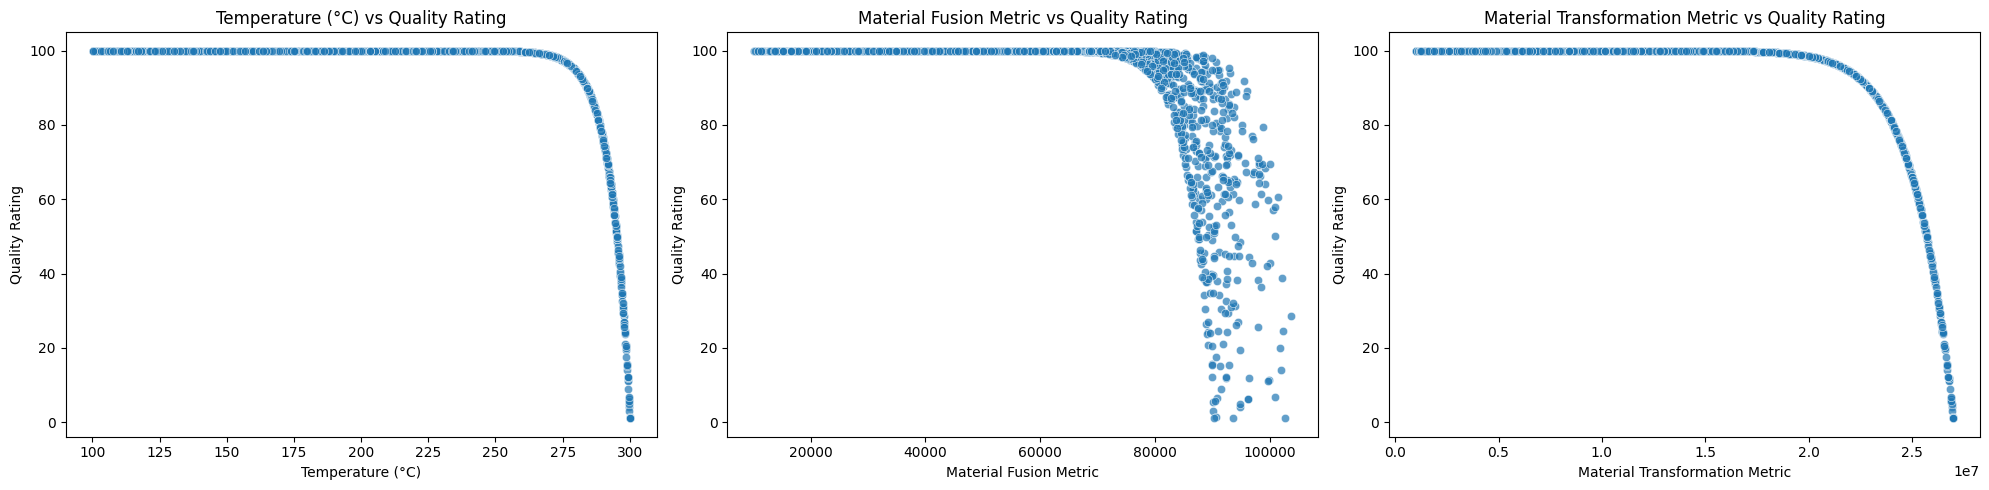

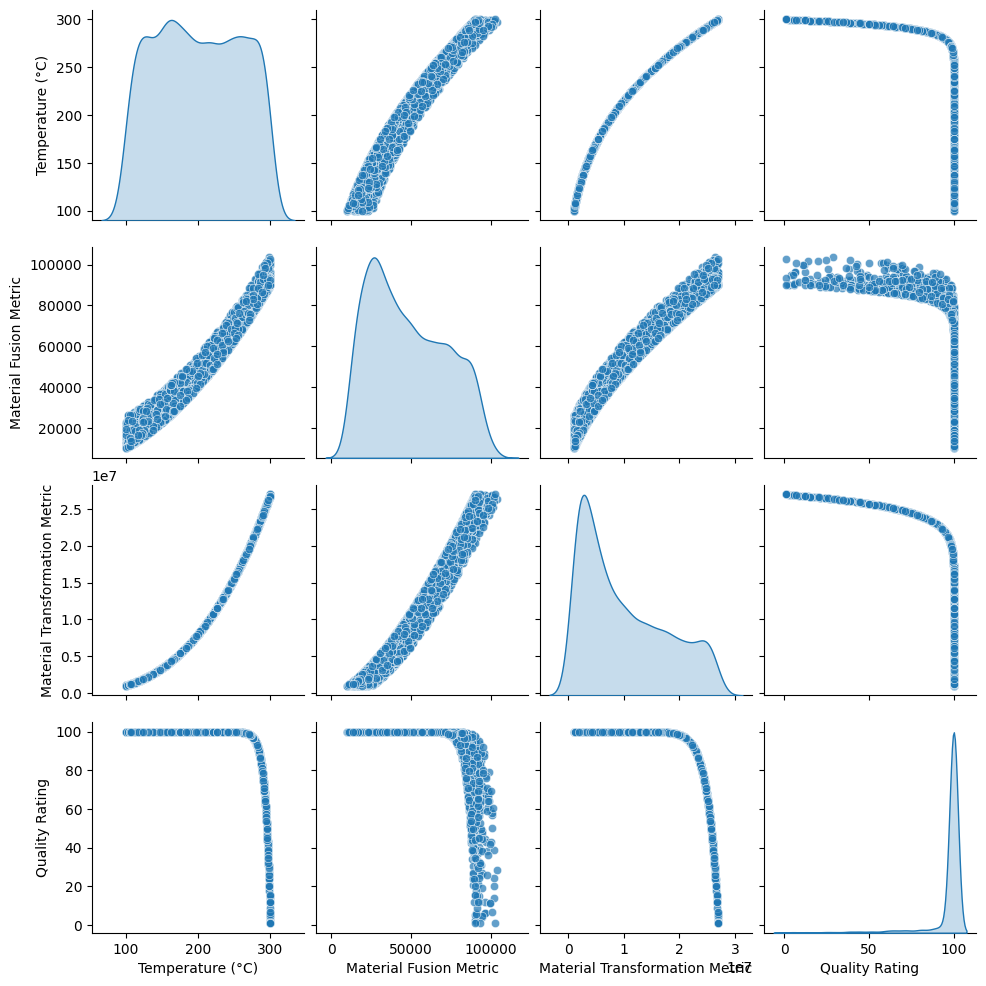

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assurez-vous que 'df' est d√©fini et contient les colonnes n√©cessaires.
# Features et cible √† analyser
features = ['Temperature (¬∞C)', 'Material Fusion Metric', 'Material Transformation Metric']
target = 'Quality Rating'

# V√©rification de l'existence des colonnes
if set(features + [target]).issubset(df.columns):
    # Scatter plots individuels
    plt.figure(figsize=(20, 5))

    for i, col in enumerate(features):
        plt.subplot(1, len(features), i + 1)  # Subplots c√¥te √† c√¥te
        sns.scatterplot(x=df[col], y=df[target], marker='o', alpha=0.7)
        plt.title(f"{col} vs {target}")
        plt.xlabel(col)
        plt.ylabel(target)

    plt.tight_layout()
    plt.show()

    # Pairplot pour toutes les relations
    sns.pairplot(
        df[features + [target]],
        kind='scatter',
        diag_kind='kde',
        markers='o',
        plot_kws={'alpha': 0.7}
    )
    plt.show()
else:
    print("Erreur : V√©rifiez que toutes les colonnes n√©cessaires existent dans le DataFrame.")
